# Configuration

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)

# Dataset 

In [2]:
df_dev = pd.read_csv('dataset/development.csv', index_col = 0, na_values = '-')
df_dev.head()

,YEAR,LOC,SN,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX,CO
ID,,,,,,,,,,,,,,
0,2022,Austria,0903XTR,24.918,1006.8,55.697,3.3648,22.322,1071.5,550.03,119.83,11.171,NaN,1.07640
1,2022,Romania,0903XTR,14.332,1024.1,81.857,3.2767,20.049,1037.3,533.70,110.05,10.692,102.010,10.19600
2,2022,Sweden,0903XTR,11.548,1009.1,78.389,4.9142,28.616,1093.9,539.43,147.19,12.979,NaN,0.78407
3,2022,Finland,0903XTR,25.597,1003.0,77.744,3.2325,20.749,1062.1,549.95,112.79,10.624,52.225,1.61530
4,2022,Estonia,0903XTR,13.484,1011.1,96.477,4.1968,24.230,1086.1,550.08,133.71,11.921,71.915,1.40710


Ambiental predictors: AT, AP, AH

Process predictors: AFDP, GTEP, TIT, TAT, TEY, CDP

Time predictors: YEAR, guarda CO analysis.ipynb

Geospatial predictors: LOC, guarda CO analysis.ipynb
 
Other emission predictors: NOX

In [14]:
nat_pred = {'AT':'°C', 'AP':'mbar', 'AH':'%'}
proc_pred = {'AFDP':'mbar', 'GTEP':'mbar', 'TIT':'°C', 'TAT':'°C', 'TEY':'MW/h', 'CDP':'mbar'}
target = {'CO':'mg/m^3'}

# Univariate Analysis 

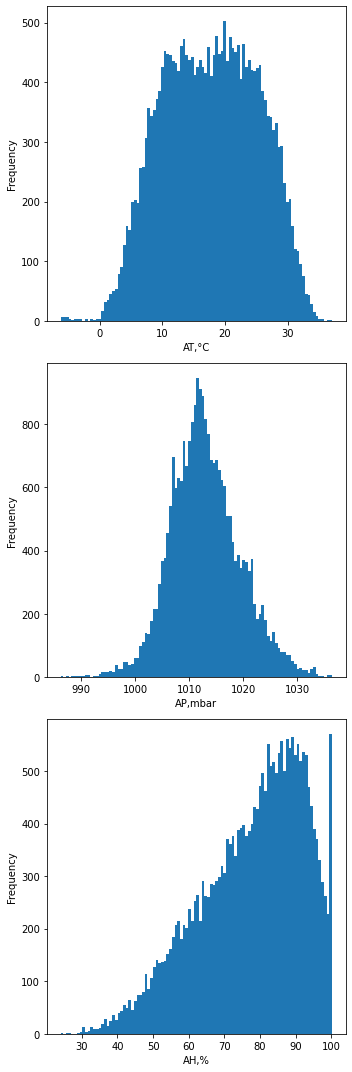

In [16]:
#plot the distribution of the Natural predictors
_, axs = plt.subplots(3,1, figsize = (5,15))
for (col,m), ax in zip(nat_pred.items(), axs):
    ax.hist(df_dev[col].values, bins = 100, alpha = 1)
    ax.set_xlabel(f'{col},{m}')
    ax.set_ylabel('Frequency')

plt.tight_layout()

The distribution of AT and AP have a bell shape, while the AH tends to have values concetrated around 90%.

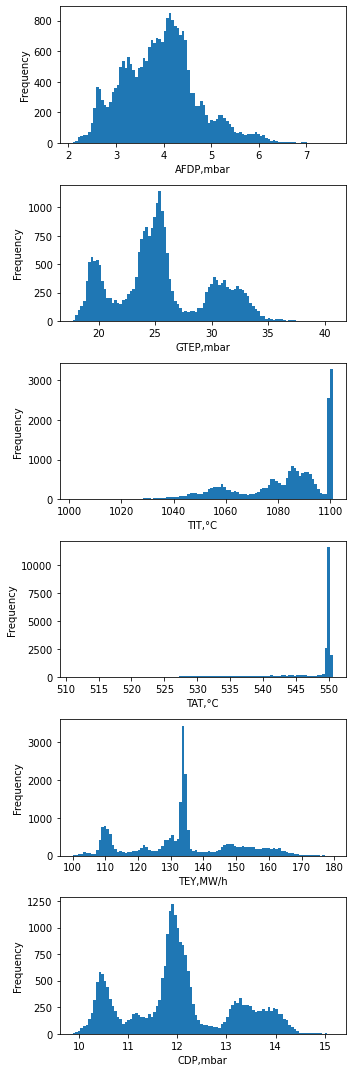

In [19]:
#plot the distribution of the Processor predictors
_, axs = plt.subplots(len(proc_pred),1, figsize = (5,15))
for (col,m), ax in zip(proc_pred.items(), axs):
    ax.hist(df_dev[col].values, bins = 100, alpha = 1)
    ax.set_xlabel(f'{col},{m}')
    ax.set_ylabel('Frequency')

plt.tight_layout()

CDP, GTEP and TEY multimodal distribution
TAT, TIT skewed distribution => high skewness

Paper Explainable Predictions of Industrial Emissions


# Multivariate Analysis

<AxesSubplot:>

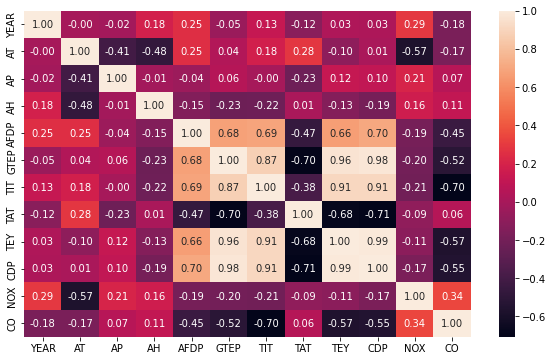

In [29]:
sns.heatmap(df_dev.corr('pearson'), annot = True, fmt = '.2f')

<AxesSubplot:>

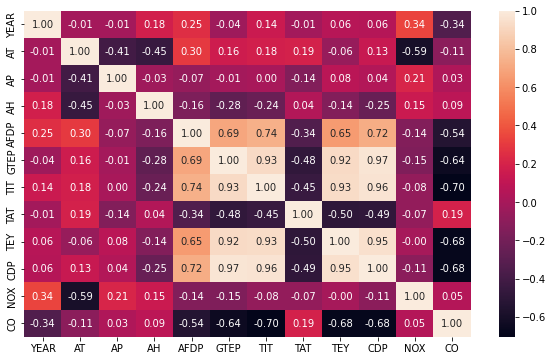

In [30]:
sns.heatmap(df_dev.corr('spearman'), annot = True, fmt = '.2f')

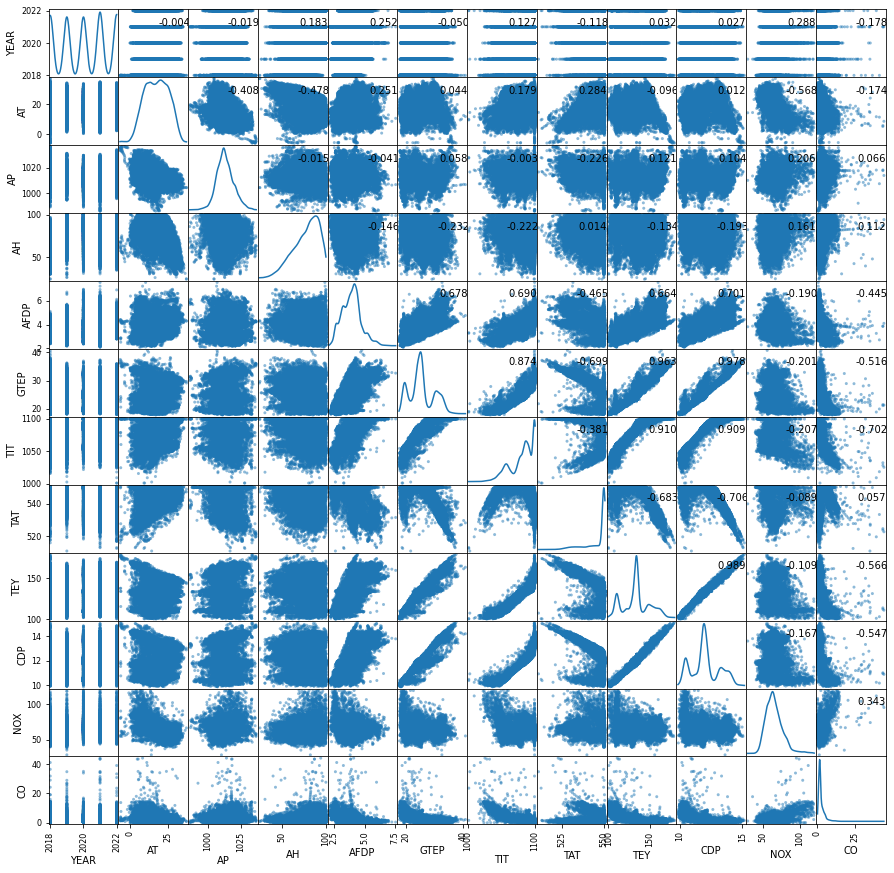

In [38]:
axes = pd.plotting.scatter_matrix(df_dev, alpha=0.5, diagonal='kde', figsize = (15,15))
corr = df_dev.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()